In [120]:
import importlib
import my_tree
importlib.reload(my_tree)
import pandas as pd
from sklearn.model_selection import train_test_split
import time
from sklearn.model_selection import StratifiedKFold


df = pd.read_csv('/Users/dashabalashova/1_1_5_ML_Bioinf/data/cancer.csv')
df['label'] = df['label'].map({'M':1, 'B':0})
kf = StratifiedKFold(n_splits=5, shuffle=True)



In [121]:
import sys
import time

N=100

t=time.time()




log_file = open("HW4_5_cancer_v3.log","w")
log_file.close()    
t = time.time()    


kf_n = 0
auc_arr = []
df_auc = pd.DataFrame(columns=['kfold', 'depth', 'number of trees', 'ROC AUC', 'arr'])
for train_index, test_index in kf.split(df, df[['label']]):
    train_df = df.iloc[train_index]
    
    validate_df = df.iloc[test_index]
    prediction_array = [[]]*10
    for d in [2, 3, 5, 7, 10]:
        prediction_array[d-1] = validate_df[['label']]
    for i in range(0, N):
        old_stdout = sys.stdout
        log_file = open("HW4_5_cancer_v3.log","a+")
        sys.stdout = log_file
        print((time.time()-t)/60)
        t = time.time()
        sys.stdout = old_stdout


        tree = my_tree.make_tree(df = train_df, I_type = 'gini', depth = 10, var_proportion = 0.1)
        
       
        for d in [2, 3, 5, 7, 10]:
            df_prediction = my_tree.tree_impl(df = validate_df, tree = tree, depth = d)
            prediction_array[d-1] = pd.concat([prediction_array[d-1], df_prediction], axis=1)

    for d in [2, 3, 5, 7, 10]:
        df_d = prediction_array[d-1]
        for n in [5, 10, 20, 30, 50, 100]:
            #print('kfold =', kf_n, 'depth =', d, 'number of trees =', n, end=' ')
            auc, R = my_tree.auc(df_d, n)
            auc_arr.append([kf_n, d, n, auc, R])
            
            df_auc = df_auc.append({'kfold':kf_n, 'depth':d, 'number of trees':n, 'ROC AUC':auc, 'arr':R}, ignore_index=True)
               
    kf_n+=1


    kfold depth number of trees   ROC AUC
28      0    10              50  0.982235
58      1    10              50  0.990149
88      2    10              50  0.996647
118     3    10              50  0.992287
148     4    10              50  0.989101


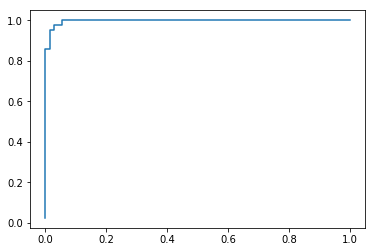

In [122]:
import matplotlib.pyplot as plt
from operator import itemgetter

df_auc

dd, nn = df_auc.groupby(['depth','number of trees']).mean().idxmax(axis=0, skipna=True)[0]

#print('depth =', dd, 'number of trees =', nn)

df_auc_3 = df_auc[(df_auc['depth']==dd) & (df_auc['number of trees']==nn)]

max_auc = df_auc_3.loc[df_auc_3['ROC AUC'].idxmax()]
print(df_auc_3.drop(columns='arr'))
plt.figure()
plt.plot(list(zip(*max_auc[4]))[0], list(zip(*max_auc[4]))[1])
plt.show()